# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak 
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan 
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

In [ ]:
# Import library di sini
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
sex_mapping = {'F': 0, 'M': 1}
data['Sex'] = data['Sex'].map(sex_mapping)

In [ ]:
data.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,9.0,6.0,8.0,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1,13.0,6.0,8.0,False
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,20.0,5.0,0.0,0,12.0,6.0,8.0,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,30.0,0.0,0.0,1,1.0,5.0,7.0,False
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,0,11.0,4.0,3.0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50736 entries, 0 to 50735
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                50736 non-null  float64
 1   HighChol              50736 non-null  float64
 2   BMI                   50736 non-null  float64
 3   Smoker                50736 non-null  float64
 4   Stroke                50736 non-null  float64
 5   HeartDiseaseorAttack  50736 non-null  float64
 6   PhysActivity          50736 non-null  float64
 7   Fruits                50736 non-null  float64
 8   Veggies               50736 non-null  float64
 9   HvyAlcoholConsump     50736 non-null  float64
 10  AnyHealthcare         50736 non-null  float64
 11  GenHlth               50736 non-null  float64
 12  MentHlth              50736 non-null  float64
 13  PhysHlth              50736 non-null  float64
 14  DiffWalk              50736 non-null  float64
 15  Sex                

In [ ]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
X_train

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
37277,1.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0,11.0,5.0,2.0
47819,0.0,0.0,35.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0,3.0,6.0,7.0
26098,1.0,0.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,0.0,0,12.0,4.0,4.0
4105,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,5.0,0.0,0.0,0,13.0,6.0,4.0
44116,1.0,1.0,24.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,13.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18498,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,1,13.0,5.0,4.0
20371,1.0,0.0,32.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,7.0,5.0,6.0
14640,1.0,0.0,39.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0,8.0,5.0,5.0
6574,0.0,0.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0,5.0,4.0,7.0


In [ ]:
y_train

37277    False
47819    False
26098    False
4105     False
44116    False
         ...  
18498     True
20371    False
14640    False
6574     False
39698    False
Name: Diabetes, Length: 32470, dtype: bool

# Bagian 1

## 1. Baseline dengan logistic regression

In [ ]:
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_pred, y_val)}")
print(f"F1 Score: {f1_score(y_pred, y_val)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_pred, y_val)}")

Accuracy: 0.8679477703867948
F1 Score: 0.24507042253521127
Confusion Matrix:
[[6872  924]
 [ 148  174]]


## 2. Analisis data

### Duplicate Value

In [ ]:
duplicateData = data[data.duplicated()]
print("Duplicated data: ", len(duplicateData))

Duplicated data:  2329


### Missing Value

In [ ]:
missingValue = data.isnull().sum()
print(f"Missing Value:\n{missingValue}")

Missing Value:
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64


### Outlier

Feature: BMI
Lower Bound: 13.5
Upper Bound: 41.5
Inside Range Outlier: 48757
Outside Range Outlier: 1979



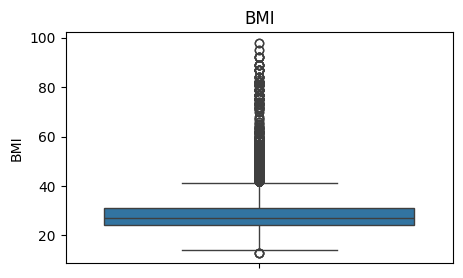

Feature: GenHlth
Lower Bound: 0.5
Upper Bound: 4.5
Inside Range Outlier: 48371
Outside Range Outlier: 2365



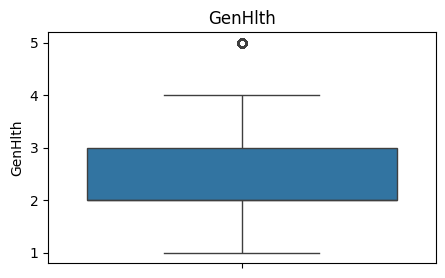

Feature: MentHlth
Lower Bound: -3.0
Upper Bound: 5.0
Inside Range Outlier: 43428
Outside Range Outlier: 7308



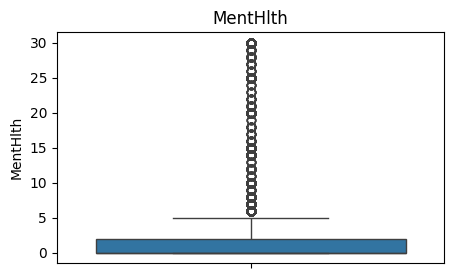

Feature: PhysHlth
Lower Bound: -4.5
Upper Bound: 7.5
Inside Range Outlier: 42538
Outside Range Outlier: 8198



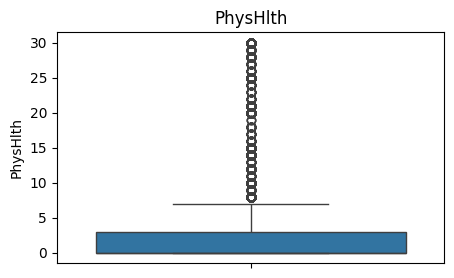

Feature: Age
Lower Bound: 0.0
Upper Bound: 16.0
Inside Range Outlier: 50736
Outside Range Outlier: 0



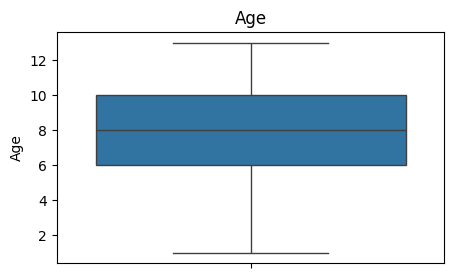

Feature: Education
Lower Bound: 1.0
Upper Bound: 9.0
Inside Range Outlier: 50736
Outside Range Outlier: 0



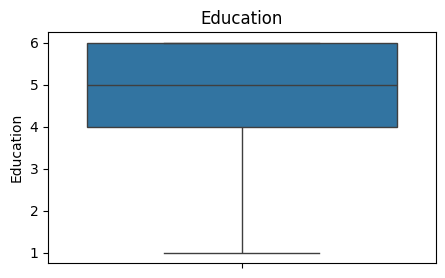

Feature: Income
Lower Bound: 0.5
Upper Bound: 12.5
Inside Range Outlier: 50736
Outside Range Outlier: 0



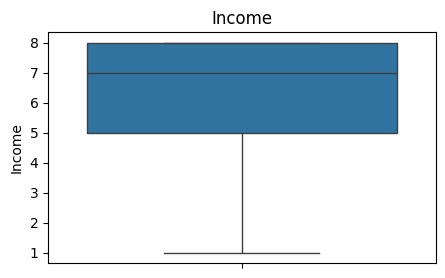

In [ ]:
for col in data.columns:
    if data[col].dtype == "int64" or data[col].dtype == "float64":
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        unique_values = data[col].unique()

        inside_range = len(data[(data[col] >= lower_bound) & (data[col] <= upper_bound)])
        outside_range = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])

        if (len(unique_values)) > 2:
            print("Feature: " + col)
            print("Lower Bound: " + str(lower_bound) + "\nUpper Bound: " + str(upper_bound))
            print("Inside Range Outlier: " + str(inside_range) + "\nOutside Range Outlier: " + str(outside_range) + "\n")

            plt.figure(figsize=(5, 3))
            sns.boxplot(data[col])
            plt.title(col)
            plt.show()

### Balance of Data

In [ ]:
values, count = np.unique(y, return_counts=True)
print(pd.DataFrame({"Values": values, "Count": count}))

   Values  Count
0   False  43790
1    True   6946


## 3. Rencana Penanganan Data

Pada dataset yang diberikan, terdapat beberapa duplicate data, missing value, outlier, dan value data yang tidak balance. Berikut rencana penanganan yang dapat dilakukan untuk mengatasi masalah tersebut. 

- Duplicate Data

Untuk baris-baris yang memiliki value duplikat dapat diatasi dengan melakukan drop baris, sehingga baris tersebut tidak akan mengganggu perhitungan.

- Missing Value

Pada dataset tidak ditemukan missing value, tetapi jika terdapat missing value dapat diatasi dengan melakukan impute untuk setiap nilai NaN tersebut dengan nilai mayoritas dari K data yang terdekat atau KNN (K-Nearest Neighbors).

- Outlier

Pada dataset terdapat beberapa kolom yang memiliki outlier. Hal ini dapat diatasi dengan mengganti value untuk setiap baris menjadi nilai upper atau lower IQR

- Imbalance Data

Terdapat jumlah data yang tidak merata pada dataset, hal tersebut dapat diatasi dengan melakukan teknik resampling. Sebagai contoh dengan teknik oversampling. Teknik ini dilakukan dengan mengurangi jumlah dari sample minoritas untuk menyeimbangkan distribusi kelas training data. 

## 4. Penjelasan Teknik Encoding

Pada dataset yang diberikan, terdapat satu atribut yang memiliki tipe data kategorikal yaitu atribut sex. Untuk dapat menggunakan atribut tersebut, kami mengubah tipe data menjadi representasi numerik menggunakan teknik encoding biner atau boolean untuk mengubahnya menjadi representasi numerik 0 dan 1 dengan Female=0 dan Male=1.

## 5. Desain Eksperimen

- Tujuan Eksperimen:

Mengembangkan model pembelajaran mesin klasifikasi biner untuk mendeteksi prediksi kasus diabetes berdasarkan beberapa tanda-tanda vital dan faktor-faktor pengaruh diabetes, dengan pemahaman yang mendalam terhadap proses analitik data, kualitas data, penanganan data, penentuan algoritma, hyperparameter, dan interpretasi hasil evaluasi model.

- Variable Dependen: Diabetes

- Variable Independen: 

HighBP, HighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age, Education, Income  

- Strategi Eksperimen:

Eksperimen dimulai dengan tahap persiapan data yang komprehensif. Pertama, identifikasi dan tangani duplikasi data untuk mencegah bias dalam analisis. Selanjutnya, lakukan penanganan nilai yang hilang dengan melakukan imputasi menggunakan metode seperti penggantian dengan mean atau median kolom terkait. Setelah itu, fokus pada deteksi dan penanganan outlier dengan menggunakan teknik seperti Interquartile Range (IQR) atau z-score untuk menentukan tindakan yang tepat terhadap outlier yang terdeteksi. Dilanjutkan dengan penanganan ketidakseimbangan data, di mana teknik seperti oversampling atau undersampling dapat diterapkan untuk menyeimbangkan distribusi kelas dalam dataset. Setelah data dipersiapkan, langkah selanjutnya adalah membangun model klasifikasi. Pertama, bagi dataset menjadi data latih dan data uji dengan memperhatikan proporsi kelas yang seimbang setelah penanganan ketidakseimbangan data. Kemudian, terapkan Grid Search untuk menemukan kombinasi hyperparameter terbaik untuk model Logistic Regression dan beberapa teknik klasifikasi data lain seperti Random Forest, KNN, Naive Bayes, Decision Tree, menggunakan teknik cross-validation untuk evaluasi yang lebih andal. Setelah hyperparameter terbaik ditentukan, latih model menggunakan data latih dan uji performa model menggunakan data uji. Evaluasi performa model dilakukan menggunakan berbagai metrik yang relevan seperti akurasi, presisi, recall, dan F1-score, serta menginterpretasikan hasil evaluasi untuk memahami kekuatan dan kelemahan masing-masing model.

- Skema Validasi:

Untuk melakukan validasi dapat menggunakan skema K-Fold Cross Validation dengan melakukan pembagian data yang akan ditrain kedalam beberapa variable. Dengan menggunakan F1 Score pada semua K-Fold, selanjutnya dapat menentukan model yang memiliki kinerja dan performa yang terbaik. Model yang sudah dipilih sebelumnya, akan dievaluasi dengan data testing. 

# Bagian 2

In [ ]:
df = data.copy()
df.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0,9.0,6.0,8.0,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1,13.0,6.0,8.0,False
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,20.0,5.0,0.0,0,12.0,6.0,8.0,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,30.0,0.0,0.0,1,1.0,5.0,7.0,False
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,0,11.0,4.0,3.0,False


## Data Preparation

### Handling duplicated data

In [ ]:
duplicateData = df[df.duplicated()].index
for index in duplicateData:
    duplicateData = df.loc[index]
    df.drop(index, inplace=True)

### Handling outlier

Inside Range Outlier: 48407
Outside Range Outlier: 0



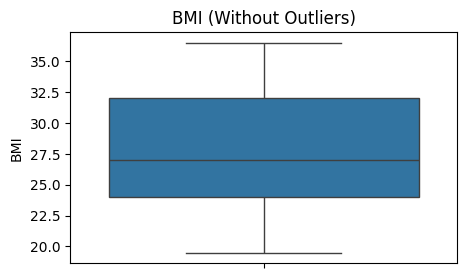

Inside Range Outlier: 48407
Outside Range Outlier: 0



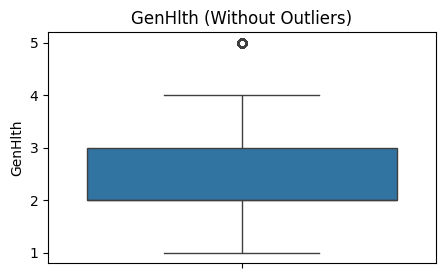

Inside Range Outlier: 48407
Outside Range Outlier: 0



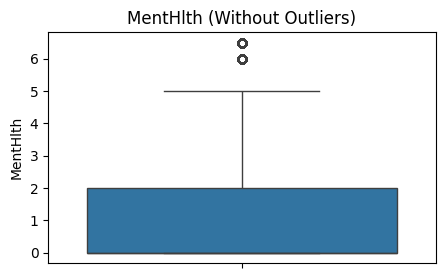

Inside Range Outlier: 48407
Outside Range Outlier: 0



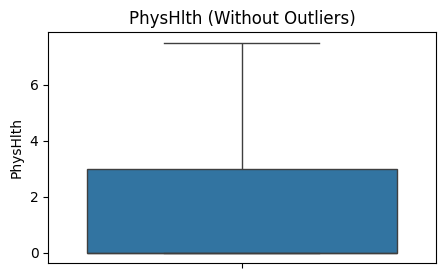

Inside Range Outlier: 48407
Outside Range Outlier: 0



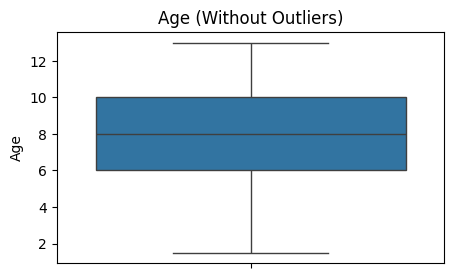

Inside Range Outlier: 48407
Outside Range Outlier: 0



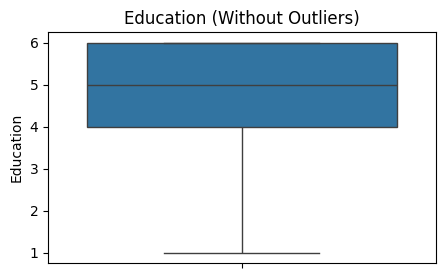

Inside Range Outlier: 48407
Outside Range Outlier: 0



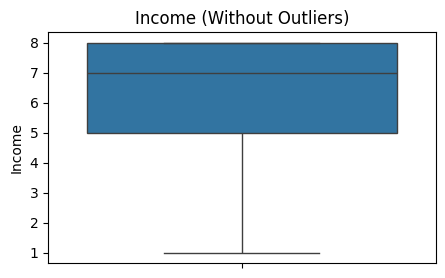

In [ ]:
for col in df.columns:
    if df[col].dtype == "int64" or df[col].dtype == "float64":

        unique_values = df[col].unique()

        if (len(unique_values)) > 2:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)

            outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

            outside_range = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
            inside_range = len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])
            
            print("Inside Range Outlier: " + str(inside_range) + "\nOutside Range Outlier: " + str(outside_range) + "\n")
            plt.figure(figsize=(5, 3))
            sns.boxplot(df[col])
            plt.title(col + " (Without Outliers)")
            plt.show()

In [ ]:
X = df.drop(columns="Diabetes")
y = df["Diabetes"].copy()

In [ ]:
values, count = np.unique(y, return_counts=True)
print(pd.DataFrame({"Values": values, "Count": count}))

   Values  Count
0   False  41481
1    True   6926


### Handling imbalanced data

In [ ]:
undersampling = RandomUnderSampler(sampling_strategy="majority", random_state=50)
undersampling_X, undersampling_y = undersampling.fit_resample(X, y)

undersampling_model = LogisticRegression(max_iter=1000, random_state=50)
undersampling_model.fit(undersampling_X, undersampling_y)

X_train, X_test, y_train, y_test = train_test_split(undersampling_X, undersampling_y, test_size=0.2, random_state=50)

undersampling_y_pred = undersampling_model.predict(X_test)

print(f"F1 Score: {f1_score(undersampling_y_pred, y_test)}")

F1 Score: 0.7398431931575196


In [ ]:
oversampling = RandomOverSampler(sampling_strategy="minority", random_state=50)
oversampling_X, oversampling_y = oversampling.fit_resample(X, y)

oversampling_model = LogisticRegression(max_iter=1000, random_state=50)
oversampling_model.fit(oversampling_X, oversampling_y)

X_train, X_test, y_train, y_test = train_test_split(oversampling_X, oversampling_y, test_size=0.2, random_state=50)

oversampling_y_pred = oversampling_model.predict(X_test)

print(f"F1 Score: {f1_score(oversampling_y_pred, y_test)}")

F1 Score: 0.7461488520332882


Pada perbandingan F1 Score menggunakan Undersampling dan Oversampling, didapatkan bahwa F1 Score pada Oversampling lebih besar sehingga dataset hasil data sampling yang akan digunakan ialah dataset hasil Oversampling. F1 Score lebih dilihat pada perbandingan ini dibandingkan Accuracy karena pada target kelas dataset yang dimiliki memiliki jumlah perbandingan False dan True yang tidak simetris.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

## Grid Search

### Random Forest Classifier

In [ ]:
randomForest = RandomForestClassifier()

forestParam = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2']
}

gridSearch = GridSearchCV(estimator=randomForest, param_grid=forestParam, cv=5, scoring='f1')
gridSearch.fit(X_train, y_train)
best_Forest = gridSearch.best_params_
best_f1 = gridSearch.best_score_

randomForest_best = gridSearch.best_estimator_
randomForest_y_pred = randomForest_best.predict(X_test)

# Calculate F1 score
f1 = f1_score(randomForest_y_pred, y_test)
print(f"F1 Score: {best_f1}")
accuracy = accuracy_score(y_test, randomForest_y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, randomForest_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.9021530526671171
Accuracy: 0.9150846742602302
Confusion Matrix:
[[7152 1131]
 [ 278 8032]]


### Naive Bayes Classifier

In [ ]:
naiveBayes = GaussianNB()
bayesParam = {   'var_smoothing': np.logspace(0,-9, num=100)}
gridSearch = GridSearchCV(estimator=naiveBayes, param_grid=bayesParam, cv=5, scoring='f1')
gridSearch.fit(X_train, y_train)
best_Bayes = gridSearch.best_params_
naive_bayes_best = gridSearch.best_estimator_
naiveBayes_y_pred = naive_bayes_best.predict(X_test)
print(f"F1 Score: {f1_score(naiveBayes_y_pred, y_test)}")
accuracy = accuracy_score(y_test, naiveBayes_y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, naiveBayes_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.7012987012987013
Accuracy: 0.7158440306153198
Confusion Matrix:
[[6343 1940]
 [2775 5535]]


### Decision Tree Classifier

In [ ]:
decisionTree = DecisionTreeClassifier()
treeParam  = { 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2']}
gridSearch = GridSearchCV(estimator=decisionTree, param_grid=treeParam, cv=5, scoring='f1')
gridSearch.fit(X_train, y_train)
best_Bayes = gridSearch.best_params_
bestF1 = gridSearch.best_score_
treeBest = gridSearch.best_estimator_
tree_y_pred = treeBest.predict(X_test)
print(f"F1 Score: {f1_score(naiveBayes_y_pred, y_test)}")
accuracy = accuracy_score(y_test, tree_y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, tree_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.7012987012987013
Accuracy: 0.9134574820707527
Confusion Matrix:
[[6948 1335]
 [ 101 8209]]


### KNN Classifier

In [ ]:
knn = KNeighborsClassifier()

knnParam = {
    'n_neighbors': [9],
    'weights': ['uniform'],
    'algorithm': ['kd_tree'],
    'p': [2]
}

gridSearch = GridSearchCV(estimator=knn, param_grid=knnParam, cv=5, scoring='f1')
gridSearch.fit(X_train, y_train)
best_KNN = gridSearch.best_params_
best_f1 = gridSearch.best_score_
knn_best = gridSearch.best_estimator_
knn_y_pred = knn_best.predict(X_test)
f1 = f1_score(y_test, knn_y_pred)
print(f"F1 Score: {best_f1}")
accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.7761465388640879
Accuracy: 0.7744229494365094
Confusion Matrix:
[[5755 2528]
 [1215 7095]]


Karena dibutuhkan waktu yang lama dalam mengeksekusi beberapa parameter dan frekuensi yang besar dalam mengeksekusi kode, kami memiilih untuk langsung memasukannya dalam code tersebut. Parameter yang kami gunakan:

knnParam = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

### Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000)

logParam = {
    'penalty': ['l1'],  
    'C': [0.1],
    'solver': ['liblinear'],
}

gridSearch = GridSearchCV(estimator=logistic_regression, param_grid=logParam, cv=5, scoring='f1')
gridSearch.fit(X_train, y_train)
best_Log = gridSearch.best_params_
best_f1 = gridSearch.best_score_
log_best = gridSearch.best_estimator_
log_y_pred = log_best.predict(X_test)

f1 = f1_score(y_test, log_y_pred)
print(f"F1 Score: {best_f1}")
accuracy = accuracy_score(y_test, log_y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.7468163428040285
Accuracy: 0.741336708250467
Confusion Matrix:
[[5977 2306]
 [1986 6324]]


Karena dibutuhkan waktu yang lama dalam mengeksekusi beberapa parameter dan frekuensi yang besar dalam mengeksekusi kode, kami memiilih untuk langsung memasukannya dalam code tersebut. Parameter yang kami gunakan:

logParam = {
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
}

## Data Training and Data Validation

In [ ]:
print("Best Parameters:", best_Forest)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

randomForest_best = RandomForestClassifier(**best_Forest)

randomForest_best.fit(X_train, y_train)

randomForest_y_pred = randomForest_best.predict(X_val)

f1 = f1_score(randomForest_y_pred, y_val)
accuracy = accuracy_score(randomForest_y_pred, y_val)
conf_matrix = confusion_matrix(randomForest_y_pred, y_val)

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


F1 Score: 0.9170249355116079
Accuracy: 0.9127617899653457
Confusion Matrix:
[[5717  246]
 [ 912 6399]]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import numpy as np

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Initialize the Random Forest classifier
randomForest_best = RandomForestClassifier(**best_Forest)

# Define the number of folds for k-fold cross-validation
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
f1_scores = []
accuracy_scores = []
conf_matrices = []

# Iterate over the folds
for train_index, val_index in kf.split(X_train):
    # Split the undersampled data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the Random Forest classifier on the training data for this fold
    randomForest_best.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set for this fold
    y_pred_fold = randomForest_best.predict(X_val_fold)
    
    # Calculate evaluation metrics for this fold
    f1_fold = f1_score(y_val_fold, y_pred_fold)
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    conf_matrix_fold = confusion_matrix(y_val_fold, y_pred_fold)
    
    # Append evaluation metrics to the lists
    f1_scores.append(f1_fold)
    accuracy_scores.append(accuracy_fold)
    conf_matrices.append(conf_matrix_fold)

# Calculate the average evaluation metrics across all folds
average_f1_score = np.mean(f1_scores)
average_accuracy = np.mean(accuracy_scores)
average_conf_matrix = np.mean(conf_matrices, axis=0)

# Print average evaluation metrics
print("Average F1 Score:", average_f1_score)
print("Average Accuracy:", average_accuracy)
print("Average Confusion Matrix:")
print(average_conf_matrix)

Average F1 Score: 0.9016453597319639
Average Accuracy: 0.8964120915340427
Average Confusion Matrix:
[[4477.2  836.6]
 [ 263.4 5041.8]]


## Data Testing

In [ ]:
randomForest_y_pred = randomForest_best.predict(X_test)

f1 = f1_score(y_test, randomForest_y_pred)

accuracy = accuracy_score(y_test, randomForest_y_pred)

print(f"F1 Score: {f1}")
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, randomForest_y_pred)
print("Confusion Matrix:")
print(conf_matrix)


F1 Score: 0.9182202905181287
Accuracy: 0.9138190803350811
Confusion Matrix:
[[7135 1148]
 [ 282 8028]]


In [ ]:
y_pred_fold = randomForest_best.predict(X_test)

f1 = f1_score(y_test, y_pred_fold)
accuracy = accuracy_score(y_test, y_pred_fold)
conf_matrix = confusion_matrix(y_test, y_pred_fold)

# Print evaluation metrics
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.9005707762557078
Accuracy: 0.8950159705900078
Confusion Matrix:
[[6962 1321]
 [ 421 7889]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86cb6b58-f534-46c8-a77b-458499737703' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>